### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace here (click on the orange Jupyter icon in the upper left then Upload), then use the Submit Project button at the bottom of this page. This will create a zip file containing both this .ipynb doc and the PDF/HTML doc that will be submitted for your project.


(1) What is the independent variable? What is the dependent variable?

The *independent variable* is word-color congruency (binary: congruent/incongruent), and the *dependent variable* is the reaction time, or time taken to name the color (continuous).

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

The mean reaction time of the population in the *congruent* condition is $μ_c$, while the mean reaction time of the population in the *incongruent* condition is $μ_i$.  *p* signifies the probability that a difference of the corresponding magnitude (or greater) between the two conditions would be found, if the null hypothesis were indeed true.

**Null hypothesis**: There is no statistically significant difference (*p*$\geq$0.05) in reaction times between congruent and incongruent words.  $H_0$: $μ_c$ = $μ_i$.

**Alternative hypothesis**: There is a statistically significant difference (*p*<0.05) in reaction times between congruent and incongruent words. $H_1$: $μ_c$ $\neq$ $μ_i$.

I chose the null hypothesis due to the fact that the default null hypothesis is that there is no (statistically significant) difference between groups.  Since $μ_i$ can differ from $μ_c$ in either direction (significantly larger, or significantly smaller), I do not consider a directional hypothesis appropriate in this case.  To note, however, from a theoretical standpoint I might predict, based on the relative difficulty of completing the *incongruent* task, that $μ_i$ > $μ_c$, in which case a directional alternative hypothesis might be approriate.

In this case, assuming the difference between the conditions is roughly normally distributed, and a non-directional alternative hypothesis, a two-tailed paired t-test (given the presence of repeated paired observations) would be appropriate.  An independent samples t-test, given that the samples are *not* independent, would not be appropriate.  The paired t-test assumes a normal distribution of (paired) differences between the two groups, and the minimum sample size for the paired t-test is 2 pairs, although in practice this would in almost all cases be considered an insufficient sample size.

I chose the t-test instead of the z-test because the paired z-test is only appropriate when the standard deviation of populatation differences is known, and typically used for larger sample sizes ($\geq$30).

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [4]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plot
import numpy as np

data = pd.read_csv("stroopdata.csv")
data.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


In both conditions respectively, the mean and the median (50th percentile) are numerically similar to each other, although the mean is higher than the median in the *incongruent* condition, suggesting that the distribution of values may be somewhat skewed towards higher values (*congruent*: 14.05 vs. 14.36; *incongruent*: 22.02 vs. 21.02).  The variability (standard deviation) in the *incongruent* condition is slightly higher.  Overall, the reaction times in the *incongruent* condition seem higher than those in the *congruent* condition.

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

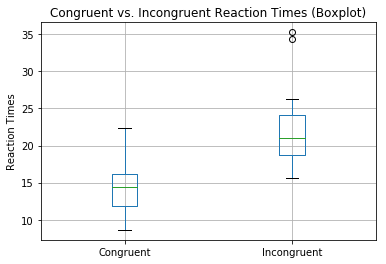

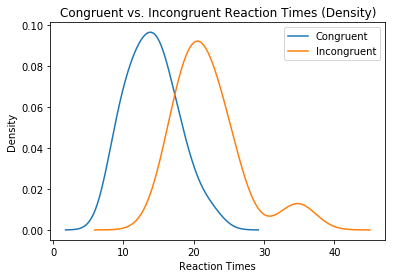

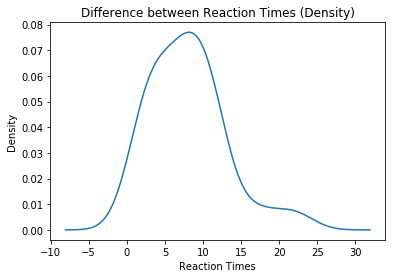

In [5]:
boxplot=data.boxplot()
boxplot.set_ylabel('Reaction Times')
boxplot.set_title('Congruent vs. Incongruent Reaction Times (Boxplot)')
plot.show()

density = data.plot(kind='kde')
density.set_xlabel('Reaction Times')
density.set_title('Congruent vs. Incongruent Reaction Times (Density)')
plot.show()

difference = data['Incongruent']-data['Congruent']
diff_density = difference.plot(kind='kde')
diff_density.set_xlabel('Reaction Times')
diff_density.set_title('Difference between Reaction Times (Density)')
plot.show()

The median is higher in the *incongruent* condition, and the distributions of values only partially overlap.  There are slightly more outliers in the "incongruent" condition, suggesting that some participants find the *incongruent* condition particularly difficult / that there is more individual variability (or possibly some error in data gathering, but the values are not so extreme that there is reason to suspect this).

In the density plots, it can also be seen that while the *congruent* and *incongruent* distributions overlap, they are clearly distinct, with overall higher values in the latter condition.  The *incongruent* distribution may also be slightly skewed to the right, depending on how one treats the outliers (this would likely be more clear if more data was collected).  However, overall, the difference between the two conditions appears to be normally distributed.

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

In [6]:

print("T-statistic:",round(stats.ttest_rel(data["Incongruent"],data["Congruent"])[0],3),"; p-value:",round(stats.ttest_rel(data["Congruent"],data["Incongruent"])[1],10),"; df:",(len(data)-1),"; confidence interval:",round(np.mean(difference),3),"+/-",round(2.069*(np.std(difference)/(23**(1/2))),3))


T-statistic: 8.021 ; p-value: 4.1e-08 ; df: 23 ; confidence interval: 7.965 +/- 2.055


The difference between the two groups is highly significant (t=8.02, *p*<.001), with slower reaction times in the *incongruent* condition, which is consistent with the *alternative hypothesis*.  The critical t value for p=0.05 and df=23 is 2.069 (https://en.wikipedia.org/wiki/Student%27s_t-distribution#Table_of_selected_values), and the 95% confidence interval for the group difference is (5.91, 10.02).

In this case, I conclude that participants experience more difficulty in naming colors in the *incongruent* condition, due to interference from the word, and therefore reject the null hypothesis ($H_0$: $μ_c$ = $μ_i$) in favor of the alternative hypothesis ($H_1$: $μ_c$ $\neq$ $μ_i$).  The Type I error associated with this test is less than 0.001 (0.1%).

The paired t-test is the appropriate test to run here, as the scores for each participant, in each condition, are related - they are therefore not independent of one another.  An independent samples t-test would therefore not be appropriate.

(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

I believe that what's responsible for the effect is humans' tendency to integrate multiple cues from the environment when interpreting stimuli, and corresponding difficulty in blocking off irrelevant cues if they are otherwise *likely to be* relevant in context, if at all present.  I also suspect that participants are *facilitated* in naming colors in the *congruent* condition, as the cues in this case converge.  In addition, in the *congruent* condition, the signal is redundant - the color is both written down, and displayed visually, most likely facilitating identification and retrieval of the word from memory.  This interpretation appears to be roughly consistent with *parallel processing* theories of the Stroop effect, which argues that information from the written word and word color are processed simultaneously, and give rise to conflict due to their incompatibility with each other (MacLeod, 1991).

An alternative task that may result in a similar effect is pairing written or spoken words (for example, naming different animals) with pictures, and asking participants to repeat or write down the word after it's displayed.  In this case, I would predict that participants are faster in repeating/writing down words that are congruent with the displayed pictures, and slower in writing down words that are incongruent.  Additionally, if participants are indeed facilitated by redundancy of cues, I would predict that participants would be slower in labeling the entity in question after seeing only the word, or only the picture.  In any case, a difference between *congruent* and *incongruent* conditions in this case would likewise suggest that participants attend to all potentially relevant cues in their environment, which they process in parallel, and are slowed down by incongruent cues.  However, due to somewhat different modality, it's unclear to what extent the results of one task would speak to the other.

MacLeod, C. M. (1991). Half a century of research on the Stroop effect: An integrative review. *Psychological Bulletin*, 109(2), 163-203.